In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn import svm
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

## Lendo os dados que foram obtidos por script python através de scrapping

In [2]:
df = pd.read_csv('./data/others/querobolsa.csv')

# Aqui é um exemplo pequeno de como funciona o nosso DataFrame (Tabela)

## Unammed: 0 é a coluna que atribui um id automatico e auto incremental para cada linha
## author: representa o nome de quem escreveu a avaliação no site
## text: uma concatenação do texto de pros e contras
## rating: Classificação de impressão positiva ou negativa do usuário em relação a universidade, baseada na nota da plataforma.

### Se a nota na plataforma for maior que 3, então é Positivo. Se for menor ou igual a 2, então Negativo. Se estiver entre esses valores, então a nota é Neutro.

In [67]:
df.head(10)

,Unnamed: 0,author,text,rating
0,0,Alexandre Luz,Tem excelente estrutura. As áreas comuns são a...,Positivo
1,1,Alexandre Luz,A cultura organizacional e do método de ensino...,Negativo
2,2,Miqueias Melo,"Começando pela estrutura que é muito positiva,...",Positivo
3,3,Miqueias Melo,As vezes a falta de comunicação de alguns prof...,Negativo
4,4,Rubem Santos,A faculdade tem muitos pontos positivos sim. A...,Neutro
5,5,Rubem Santos,Para minhas experiência um dos piores pontos n...,Negativo
6,6,Sthefanny Andrade,"A estrutura do prédio é boa, o local é seguro ...",Positivo
7,7,Sthefanny Andrade,"Por aspecto negativo, cabe salientar que com o...",Negativo
8,8,Gleidson Barbosa,"Salas espaçosas, no geral. algumas um pouco me...",Neutro
9,9,Gleidson Barbosa,Como ponto negativo as salas não possuem ar co...,Negativo


In [64]:
df.rating.value_counts()

rating
Negativo    4010
Positivo    3206
Neutro       804
Name: count, dtype: int64

<Axes: xlabel='rating'>

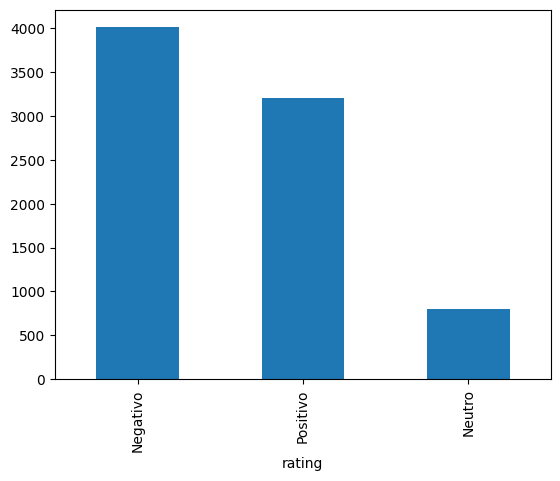

In [66]:
%matplotlib inline
df.rating.value_counts().plot(kind='bar')

In [65]:
texto = df['text'].values
classificacao = df['rating'].values

In [72]:
type(texto)
type(classificacao)

numpy.ndarray

# Bag of Words (BoW) - Processo de Vetorização

## 1. Tokenização:

O primeiro passo é dividir o texto em unidades menores chamadas "tokens". Em BoW, os tokens geralmente são palavras, mas podem ser n-gramas ou até mesmo caracteres, dependendo da granularidade desejada.

**Exemplo:**

Texto: "A análise de sentimentos é uma parte interessante do processamento de linguagem natural."

Tokens: ["A", "análise", "de", "sentimentos", "é", "uma", "parte", "interessante", "do", "processamento", "de", "linguagem", "natural"]


## 2. Construção do Vocabulário:

Em seguida, cria-se um vocabulário único a partir de todos os tokens encontrados no corpus (conjunto de documentos). Cada palavra única no vocabulário recebe um índice único.

**Exemplo:**

Vocabulário: {"A": 0, "análise": 1, "de": 2, "sentimentos": 3, "é": 4, "uma": 5, "parte": 6, "interessante": 7, "do": 8, "processamento": 9, "linguagem": 10, "natural":11}

## 3. Contagem de Ocorrências:

Para cada documento, conta-se quantas vezes cada palavra do vocabulário aparece no documento. Essa contagem é armazenada em um vetor

**Exemplo:**

Vetor do Documento: [1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Este vetor representa a contagem de ocorrências de cada palavra no documento em relação ao vocabulário.

## 4. Vetorização Final:

O conjunto de vetores resultante, um para cada documento, forma a representação final do BoW para o corpus.

**Exemplo (Dois Documentos):**

Documento 1: [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Documento 2: [0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1, 1]

Cada posição no vetor representa a contagem de ocorrências de uma palavra específica no documento.

## Considerações Finais:

- BoW perde a ordem das palavras e considera apenas a presença ou ausência delas.
- Pode resultar em vetores esparsos, especialmente em grandes vocabulários.
- Pode ser usadgoritmos de aprendizado.
.
tos):**
lo:**
:**
]


In [115]:
testes = ['Essa faculdade está um lixo', 'Essa faculdade é boa', 'Essa faculdade não é boa', 'Não sei se amo ou odeio essa faculdade', 'Amo a UNIP', 'Não', 'Sim', 'Talvez']

In [116]:
unigram_vectorizer = CountVectorizer()
test_matrix = unigram_vectorizer.fit_transform(testes)
count_array = test_matrix.toarray()
df = pd.DataFrame(data=count_array,columns = unigram_vectorizer.vocabulary_.keys())
print(df)

   essa  faculdade  está  um  lixo  boa  não  sei  se  amo  ou  odeio  unip  \
0     0          0     1   1     1    1    0    0   0    0   0      0     0   
1     0          1     1   0     1    0    0    0   0    0   0      0     0   
2     0          1     1   0     1    0    1    0   0    0   0      0     0   
3     1          0     1   0     1    0    1    1   1    1   1      0     0   
4     1          0     0   0     0    0    0    0   0    0   0      0     0   
5     0          0     0   0     0    0    1    0   0    0   0      0     0   
6     0          0     0   0     0    0    0    0   0    0   0      1     0   
7     0          0     0   0     0    0    0    0   0    0   0      0     1   

   sim  talvez  
0    1       0  
1    0       0  
2    0       0  
3    0       0  
4    0       1  
5    0       0  
6    0       0  
7    0       0  


In [117]:
bigram_vectorizer = CountVectorizer(ngram_range=(2,2))
test_matrix_bigram = bigram_vectorizer.fit_transform(testes)
count_array = test_matrix_bigram.toarray()
df = pd.DataFrame(data=count_array,columns = bigram_vectorizer.vocabulary_.keys())
print(df)

   essa faculdade  faculdade está  está um  um lixo  faculdade boa  \
0               0               0        1        1              0   
1               0               0        1        0              1   
2               0               0        1        0              0   
3               1               0        1        0              0   
4               0               1        0        0              0   
5               0               0        0        0              0   
6               0               0        0        0              0   
7               0               0        0        0              0   

   faculdade não  não boa  não sei  sei se  se amo  amo ou  ou odeio  \
0              1        0        0       0       0       0         0   
1              0        0        0       0       0       0         0   
2              0        1        1       0       0       0         0   
3              0        0        0       1       1       1         1   
4        

In [133]:
unigram_text = unigram_vectorizer.fit_transform(texto)

In [140]:
bigram_text = bigram_vectorizer.fit_transform(texto)

In [134]:
unigram_model = MultinomialNB()
unigram_model.fit(unigram_text, classificacao)

MultinomialNB()

In [144]:
bigram_model = MultinomialNB()
bigram_model.fit(bigram_text, classificacao)

MultinomialNB()

In [135]:
unigram_text.shape

(8020, 10005)

In [145]:
bigram_text.shape

(8020, 80199)

In [138]:
unigram_tests = unigram_vectorizer.transform(testes)

In [146]:
bigram_tests = bigram_vectorizer.transform(testes)

In [125]:
unigram_results = cross_val_predict(unigram_model, unigram_text, classificacao, cv=10)

In [126]:
bigram_results = cross_val_predict(bigram_model, bigram_text, classificacao, cv=10)

In [127]:
print(metrics.accuracy_score(classificacao, unigram_results))

0.8634663341645885


In [128]:
print(metrics.accuracy_score(classificacao, bigram_results))

0.8255610972568579


In [139]:
for t, c in zip(testes, unigram_model.predict(unigram_tests)):
    print(f'{t} || {c}')

Essa faculdade está um lixo || Negativo
Essa faculdade é boa || Positivo
Essa faculdade não é boa || Positivo
Não sei se amo ou odeio essa faculdade || Negativo
Amo a UNIP || Positivo
Não || Negativo
Sim || Negativo
Talvez || Negativo


In [147]:
for t, c in zip(testes, bigram_model.predict(bigram_tests)):
    print(f'{t} || {c}')

Essa faculdade está um lixo || Negativo
Essa faculdade é boa || Positivo
Essa faculdade não é boa || Negativo
Não sei se amo ou odeio essa faculdade || Negativo
Amo a UNIP || Positivo
Não || Negativo
Sim || Negativo
Talvez || Negativo


In [151]:
print(unigram_model.classes_)
unigram_model.predict_proba(unigram_tests).round(2)

['Negativo' 'Neutro' 'Positivo']


array([[0.69, 0.01, 0.3 ],
       [0.1 , 0.08, 0.83],
       [0.38, 0.05, 0.57],
       [0.91, 0.  , 0.08],
       [0.07, 0.02, 0.91],
       [0.85, 0.03, 0.12],
       [0.73, 0.08, 0.2 ],
       [0.86, 0.06, 0.08]])

In [152]:
print(bigram_model.classes_)
bigram_model.predict_proba(bigram_tests).round(2)

['Negativo' 'Neutro' 'Positivo']


array([[0.69, 0.02, 0.3 ],
       [0.06, 0.06, 0.88],
       [0.94, 0.  , 0.06],
       [0.64, 0.02, 0.33],
       [0.39, 0.07, 0.54],
       [0.5 , 0.1 , 0.4 ],
       [0.5 , 0.1 , 0.4 ],
       [0.5 , 0.1 , 0.4 ]])

In [153]:
def add_neg(texto):
    neg = ['não', 'not', 'Não']
    neg_detected = False
    res = []
    words = texto.split()
    for p in words:
        p = p.lower()
        if neg_detected == True:
            p = p + '_NEG'
        if p in neg:
            neg_detected = True
        res.append(p)
    return(" ".join(res))

In [154]:
add_neg('Eu gosto da faculade e gostaria de continuar estudando aqui')

'eu gosto da faculade e gostaria de continuar estudando aqui'

In [155]:
add_neg('Eu não gosto da faculdade')

'eu não gosto_NEG da_NEG faculdade_NEG'

In [156]:
simple_pipeline = Pipeline([('counts', CountVectorizer()), ('classifier', MultinomialNB())])

In [157]:
neg_pipeline = Pipeline([('counts', CountVectorizer(tokenizer=lambda text: add_neg(text))), ('classifier', MultinomialNB())])

In [158]:
simple_pipeline.fit(texto, classificacao)

Pipeline(steps=[('counts', CountVectorizer()), ('classifier', MultinomialNB())])

In [159]:
simple_pipeline.steps

[('counts', CountVectorizer()), ('classifier', MultinomialNB())]

In [160]:
neg_pipeline.fit(texto, classificacao)

Pipeline(steps=[('counts',
                 CountVectorizer(tokenizer=<function <lambda> at 0x000001A3E6429FC0>)),
                ('classifier', MultinomialNB())])

In [161]:
neg_pipeline.steps

[('counts',
  CountVectorizer(tokenizer=<function <lambda> at 0x000001A3E6429FC0>)),
 ('classifier', MultinomialNB())]

In [162]:
simple_pipeline = Pipeline([('counts', CountVectorizer()), ('classifier', svm.SVC(kernel='linear'))])

In [163]:
neg_pipeline = Pipeline([('counts', CountVectorizer(tokenizer=lambda text: add_neg(text))), ('classifier', svm.SVC(kernel='linear'))])

In [164]:
simple_res = cross_val_predict(simple_pipeline, texto, classificacao, cv=10)

In [165]:
sentimento = ['Positivo', 'Negativo', 'Neutro']
print(metrics.classification_report(classificacao, simple_res))

              precision    recall  f1-score   support

    Negativo       0.93      0.95      0.94      4010
      Neutro       0.26      0.20      0.23       804
    Positivo       0.79      0.82      0.81      3206

    accuracy                           0.82      8020
   macro avg       0.66      0.66      0.66      8020
weighted avg       0.81      0.82      0.82      8020



In [166]:
print(metrics.classification_report(classificacao, neg_res))

              precision    recall  f1-score   support

    Negativo       0.78      0.86      0.82      4010
      Neutro       0.33      0.00      0.00       804
    Positivo       0.69      0.77      0.73      3206

    accuracy                           0.74      8020
   macro avg       0.60      0.55      0.52      8020
weighted avg       0.70      0.74      0.70      8020



In [167]:
print (pd.crosstab(classificacao, neg_res, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo      3467       2       541  4010
Neutro         246       2       556   804
Positivo       741       2      2463  3206
All           4454       6      3560  8020


In [168]:
sentimento = ['Positivo', 'Negativo', 'Neutro']
print(metrics.classification_report(classificacao, unigram_results))

              precision    recall  f1-score   support

    Negativo       0.95      0.97      0.96      4010
      Neutro       0.25      0.02      0.03       804
    Positivo       0.79      0.95      0.86      3206

    accuracy                           0.86      8020
   macro avg       0.66      0.64      0.62      8020
weighted avg       0.81      0.86      0.82      8020



In [169]:
sentimento = ['Positivo', 'Negativo', 'Neutro']
print(metrics.classification_report(classificacao, bigram_results))

              precision    recall  f1-score   support

    Negativo       0.95      0.90      0.93      4010
      Neutro       0.14      0.07      0.09       804
    Positivo       0.77      0.92      0.84      3206

    accuracy                           0.83      8020
   macro avg       0.62      0.63      0.62      8020
weighted avg       0.80      0.83      0.81      8020



In [170]:
print(pd.crosstab(classificacao, unigram_results, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo      3876      23       111  4010
Neutro          76      15       713   804
Positivo       149      23      3034  3206
All           4101      61      3858  8020


#Predicoes unigram

- 3876 de 4010 Negativos - 0,966
- 15 de 804 Neutros - 0,018
- 3034 de 3206 Positivos - 0,946

In [171]:
print(pd.crosstab(classificacao, bigram_results, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo      3622     191       197  4010
Neutro          79      55       670   804
Positivo       106     156      2944  3206
All           3807     402      3811  8020


In [177]:
live_test = []
user_input = input('insira sua frase para teste: ')
live_test.append(user_input)
print('\n')
unigram_live = unigram_vectorizer.transform(live_test)
bigram_live = bigram_vectorizer.transform(live_test)

print('Unigram Result')
for t, c in zip(live_test, unigram_model.predict(unigram_live)):
    print(f'{t} || {c}')
print('\n')
print('Bigram Result')
for t, c in zip(live_test, bigram_model.predict(bigram_live)):
    print(f'{t} || {c}')

insira sua frase para teste:  eu odeio viver




Unigram Result
eu odeio viver || Positivo


Bigram Result
eu odeio viver || Negativo
